In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [3]:
from statsmodels.tsa.stattools import adfuller

import pmdarima

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

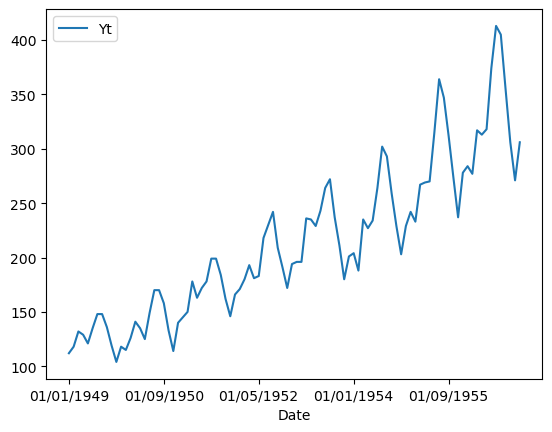

In [6]:
df=pd.read_csv(r'airline_data_mult_wes - Python.csv')
df=df.set_index("Date")
df.plot()

In [7]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)

In [8]:
adfuller(train_df)

(-0.5650926919098963,
 0.8786761935289898,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 454.8402621826258)

pmdarima.arima.nsdiffs(train_df['Yt'],m=12)

In [9]:
model = ExponentialSmoothing(train_df,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_trend=0.11,smoothing_level=0.2,smoothing_seasonal=0.3)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [10]:
model.summary()

Dep. Variable:,Yt,No. Observations:,72
Model:,ExponentialSmoothing,SSE,5716.209
Optimized:,True,AIC,346.956
Trend:,Multiplicative,BIC,383.383
Seasonal:,Multiplicative,AICC,359.862
Seasonal Periods:,12,Date:,"Tue, 19 Sep 2023"
Box-Cox:,False,Time:,22:26:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.1100000,beta,False


In [11]:
model = ExponentialSmoothing(train_df,trend='mul',seasonal='mul',seasonal_periods=12).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Dep. Variable:,Yt,No. Observations:,72
Model:,ExponentialSmoothing,SSE,2946.125
Optimized:,True,AIC,299.234
Trend:,Multiplicative,BIC,335.660
Seasonal:,Multiplicative,AICC,312.139
Seasonal Periods:,12,Date:,"Tue, 19 Sep 2023"
Box-Cox:,False,Time:,22:26:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6134675,alpha,True
smoothing_trend,0.000000,beta,True


In [12]:
fitted_values=model.fittedvalues
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)
fitted_values_df

,Fitted_Values
0,112.999390
1,113.144392
2,135.925834
3,128.439780
4,128.606914
...,...
67,299.265951
68,262.690304
69,230.626135
70,202.012703


In [13]:
forecast_validation = model.forecast(24)
forecast_validation_df=pd.DataFrame(forecast_validation)
forecast_validation_df.rename(columns = {0:'Forecast'}, inplace = True)
forecast_validation_df

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Forecast
72,233.064627
73,234.636751
74,274.649767
75,264.204809
76,263.842624
77,293.361195
78,324.747044
79,327.242004
80,290.984772
81,257.687728


In [14]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_validation_df])
fitted_forecast_df

,Fitted_Values,Forecast
0,112.999390,NaN
1,113.144392,NaN
2,135.925834,NaN
3,128.439780,NaN
4,128.606914,NaN
...,...,...
91,NaN,367.314156
92,NaN,326.617074
93,NaN,289.242669
94,NaN,254.457437


In [15]:
df_graph=df.reset_index(drop=True)

In [16]:
final_df=pd.concat([fitted_forecast_df,df_graph],axis=1)

In [17]:
date_range = pd.date_range(start='1949-01-01', end='1956-12-01',freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)

In [18]:
final_df=pd.concat([final_df,date_range_df],axis=1)

In [19]:
final_df=final_df.set_index("Date")
final_df


,Fitted_Values,Forecast,Yt
Date,,,
1949-01-01,112.999390,NaN,112
1949-02-01,113.144392,NaN,118
1949-03-01,135.925834,NaN,132
1949-04-01,128.439780,NaN,129
1949-05-01,128.606914,NaN,121
...,...,...,...
1956-08-01,NaN,367.314156,405
1956-09-01,NaN,326.617074,355
1956-10-01,NaN,289.242669,306


In [20]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(final_df["Yt"],final_df["Forecast"])

6.03478791753447

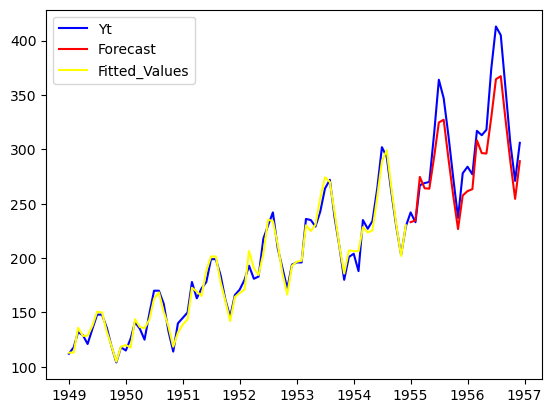

In [21]:
fig, ax = plt.subplots()
ax.plot(final_df["Yt"], label="Yt",color='blue')
ax.plot(final_df["Forecast"], label="Forecast",color='red')
ax.plot(final_df["Fitted_Values"], label="Fitted_Values",color='yellow')
ax.legend()

In [22]:
mp=model.params

In [23]:
mp=pd.DataFrame(mp)

In [24]:
mp

,smoothing_level,smoothing_trend,smoothing_seasonal,damping_trend,initial_level,initial_trend,initial_seasons,use_boxcox,lamda,remove_bias
0,0.613467,0.0,0.0,NaN,114.726301,1.009673,0.975511,False,None,False
1,0.613467,0.0,0.0,NaN,114.726301,1.009673,0.972683,False,None,False
2,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.127649,False,None,False
3,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.074372,False,None,False
4,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.062620,False,None,False
5,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.170187,False,None,False
6,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.282971,False,None,False
7,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.280442,False,None,False
8,0.613467,0.0,0.0,NaN,114.726301,1.009673,1.127666,False,None,False
9,0.613467,0.0,0.0,NaN,114.726301,1.009673,0.989061,False,None,False


In [25]:
final_model = ExponentialSmoothing(df,trend='mul',seasonal='mul',seasonal_periods=12).fit(smoothing_trend=mp.iloc[0,1],smoothing_level=mp.iloc[0,0],smoothing_seasonal=mp.iloc[0,2])

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [26]:
forecast_future = final_model.forecast(24)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
df_graph=df.reset_index(drop=True)

In [28]:
final=pd.concat([df_graph,forecast_future])

In [29]:
final.rename(columns = {0:'Forecast'}, inplace = True)

<AxesSubplot:xlabel='Date'>

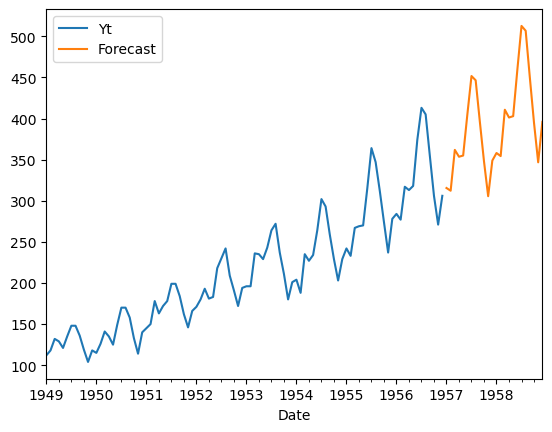

In [30]:
date_range = pd.date_range(start='1949-01-01', periods=120,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)
date_range_df
final=pd.concat([final,date_range_df],axis=1)
final=final.set_index("Date")
final.plot()